<a href="https://colab.research.google.com/github/fuleabhijit/AI-Analyst-Chat/blob/main/ML_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt

In [ ]:
df=pd.read_csv("/Users/prayagadage/Desktop/Python_By_CJC/DATA_SCIENCE_CJC/Machine_Learning/Dataset/house_price_dataset_EDAML.csv")

In [ ]:
#Problems:
# 1. Negative Values
# 2. Outliers

In [ ]:
df1=df.copy()
df1

,Size (sq. ft.),Bedrooms,Bathrooms,Age of House (Years),Distance to City Center (Miles),Price
0,2247.976523,4,4,10,18.061996,-41314.491195
1,4783.142948,2,3,27,16.928083,26080.200702
2,3820.773344,5,3,4,17.874385,41343.912294
3,3234.097330,3,1,11,0.214683,278363.592384
4,1286.482018,3,2,2,14.863879,-110631.619825
...,...,...,...,...,...,...
9995,4373.686348,5,1,1,11.890596,137531.235086
9996,4549.038874,1,3,40,14.885911,-4445.572123
9997,4765.514826,1,3,21,17.199960,-26520.593043
9998,2348.947167,2,1,8,7.219266,52998.779388


In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Size (sq. ft.)                   10000 non-null  float64
 1   Bedrooms                         10000 non-null  int64  
 2   Bathrooms                        10000 non-null  int64  
 3   Age of House (Years)             10000 non-null  int64  
 4   Distance to City Center (Miles)  10000 non-null  float64
 5   Price                            10000 non-null  float64
dtypes: float64(3), int64(3)
memory usage: 468.9 KB


In [ ]:
df1.isnull().sum()

Size (sq. ft.)                     0
Bedrooms                           0
Bathrooms                          0
Age of House (Years)               0
Distance to City Center (Miles)    0
Price                              0
dtype: int64

In [ ]:
for i in df1.columns:
    print((df1[i]<0).sum())

0
0
0
0
0
0


In [ ]:
df1["Price"]=df1["Price"].abs()

In [ ]:
df1

,Size (sq. ft.),Bedrooms,Bathrooms,Age of House (Years),Distance to City Center (Miles),Price
0,2247.976523,4,4,10,18.061996,41314.491195
1,4783.142948,2,3,27,16.928083,26080.200702
2,3820.773344,5,3,4,17.874385,41343.912294
3,3234.097330,3,1,11,0.214683,278363.592384
4,1286.482018,3,2,2,14.863879,110631.619825
...,...,...,...,...,...,...
9995,4373.686348,5,1,1,11.890596,137531.235086
9996,4549.038874,1,3,40,14.885911,4445.572123
9997,4765.514826,1,3,21,17.199960,26520.593043
9998,2348.947167,2,1,8,7.219266,52998.779388


In [ ]:
data=df1["Price"]
q1,q3=np.percentile(data,[25,75])
iqr=q3-q1

lower_bound=q1-(1.5*iqr)
upper_bound=q3+(1.5*iqr)
print(lower_bound)
print(upper_bound)
print()
outliers=[x for x in data if x<lower_bound or x>upper_bound]
outliers

-136888.70899515963
373353.6257881205



[]

In [ ]:
median=df1["Price"].median()
median

110532.40518912539

In [ ]:
outliers

[]

In [ ]:
# for i in df1["Price"]:
#     if i<lower_bound or i>upper_bound:
#         df1["Price"]=df1["Price"].replace(i,median)

In [ ]:
outlier_mask = (df1["Price"] < lower_bound) | (df1["Price"] > upper_bound)


In [ ]:
df1.loc[outlier_mask, "Price"] = median

In [ ]:
y=df1["Price"]
X=df1[["Size (sq. ft.)","Bedrooms","Bathrooms","Age of House (Years)","Distance to City Center (Miles)"]]

In [ ]:
y.ndim

1

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=64)

In [ ]:
y_train.ndim

1

In [ ]:
print(X_test,y_test)

      Size (sq. ft.)  Bedrooms  Bathrooms  Age of House (Years)  \
5158     2686.294962         2          1                    29   
596      3537.254049         3          1                    49   
3095     3558.826191         5          1                     9   
2015     2408.820651         4          4                    18   
6626     4154.458388         5          1                    37   
...              ...       ...        ...                   ...   
9738     1971.821646         1          1                    15   
9742     4348.307123         5          1                    42   
5654     1154.884623         2          3                    28   
5497     4511.602688         5          4                     4   
5416     2155.282045         3          2                    37   

      Distance to City Center (Miles)  
5158                        14.487383  
596                         18.613364  
3095                        17.837407  
2015                        17.3431

In [ ]:
y_test

5158     81059.802158
596      93534.828705
3095      6035.858904
2015     52306.849993
6626     74290.595162
            ...      
9738       196.399244
9742    307381.767772
5654    224064.499659
5497    267786.569541
5416     83936.936445
Name: Price, Length: 2000, dtype: float64

In [ ]:
lm=LinearRegression()

In [ ]:
lm.fit(X_train,y_train)

LinearRegression()

In [ ]:
y_predict=lm.predict(X_test)

In [ ]:
mse=mean_squared_error(y_test,y_predict)

In [ ]:
mse

5214628776.54448

In [ ]:
rmse=sqrt(mse)

In [ ]:
rmse

72212.38658668248

In [ ]:
lm.predict([[2686.294962,2,1,29,14.487383]])

/opt/anaconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([75118.05427843])

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
if 'target' in df1.columns:
    target = 'target'
    plt.figure(figsize=(15, n_rows * 4))
    for i, feature in enumerate(numerical_features):
        if feature != target:  # Skip plotting target against itself
            plt.subplot(n_rows, n_cols, i + 1)
            plt.scatter(df1[feature], df1[target], alpha=0.5)
            plt.title(f'{feature} vs {target}')
            plt.xlabel(feature)
            plt.ylabel(target)
    plt.tight_layout()
    plt.show()

Mean Squared Error (MSE): 5214628776.54
Root Mean Squared Error (RMSE): 72212.39
Mean Absolute Error (MAE): 58495.51
R-squared (R²): 0.2916
Mean Absolute Percentage Error (MAPE): 276.18%


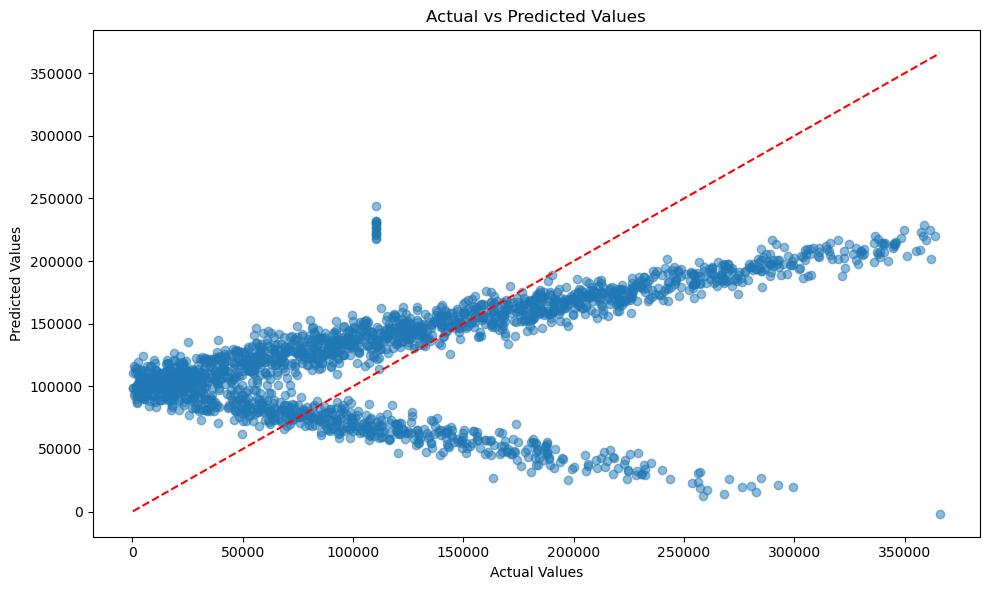

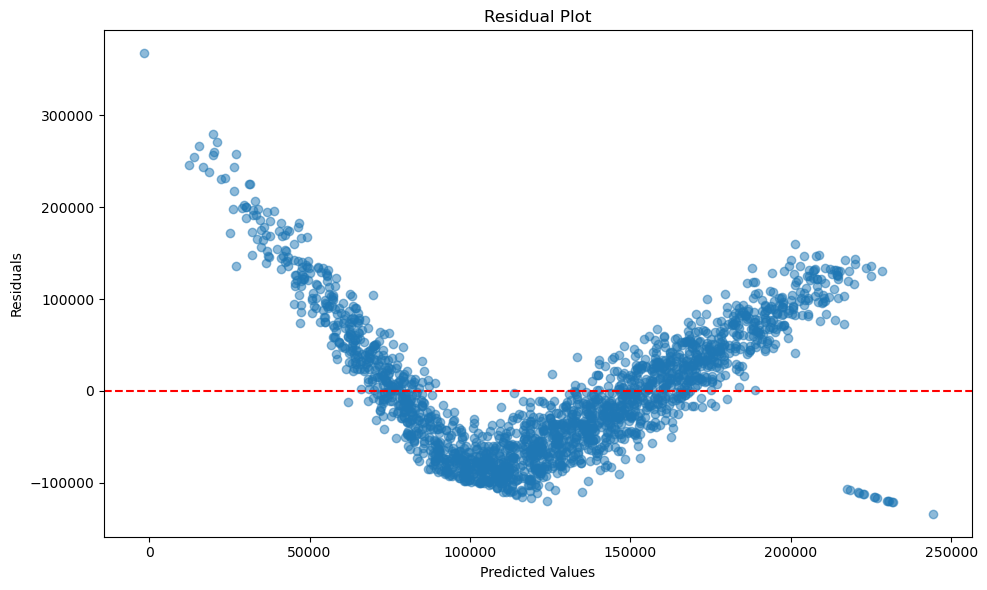

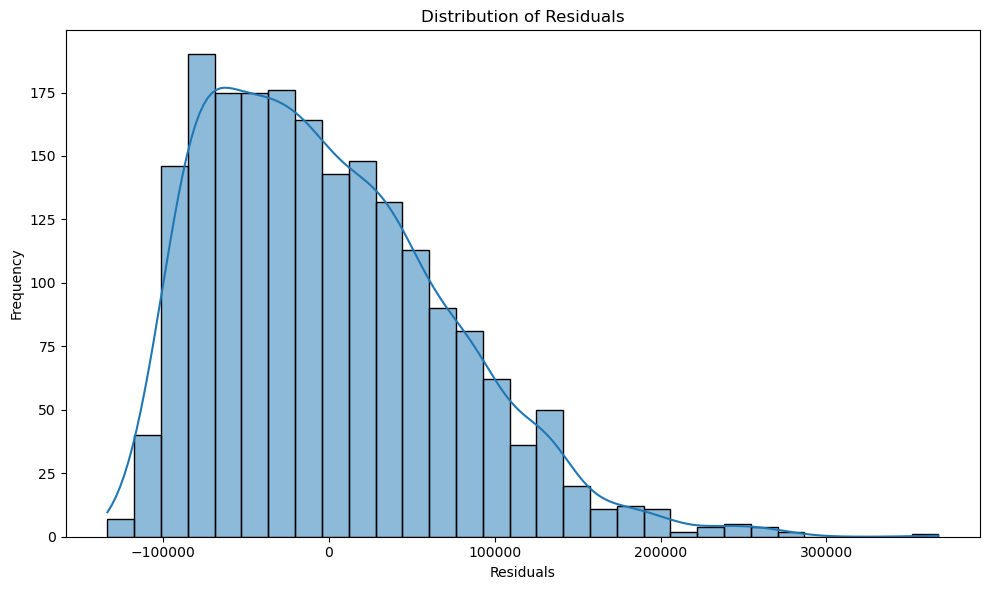

In [ ]:
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from math import sqrt

# Assuming you have your model trained and you want to evaluate it on test data
# model = your_trained_model (e.g., lm, rf_model, etc.)
# X_test = your test features
# y_test = your test target values

# Make predictions
y_pred = lm.predict(X_test)

# Calculate metrics
mse = mean_squared_error(y_test, y_pred)
rmse = sqrt(mse)  # or np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Calculate MAPE (Mean Absolute Percentage Error)
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100

# Print metrics
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"R-squared (R²): {r2:.4f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")

# Visualize actual vs predicted values
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.tight_layout()
plt.show()

# Visualize residuals
residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.tight_layout()
plt.show()

# Histogram of residuals
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True)
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Distribution of Residuals')
plt.tight_layout()
plt.show()
